## Algorithm Selection & Justification

We selected two supervised learning models **Naive Bayes (NB)** and **Support Vector Machine (SVM)** for emotion prediction.

**Naive Bayes (NB)**:
was chosen as a fast, simple probabilistic baseline that performs well on text data represented by word frequencies (TF-IDF). It provides interpretable results and establishes a solid benchmark for performance comparison.

**Support Vector Machine (SVM)** :
was chosen for its ability to handle high-dimensional data and find optimal decision boundaries. Using a linear kernel, it effectively captures linearly separable patterns in emotional expressions while maintaining robustness against overfitting.

Together, NB and SVM offer complementary strengths: NB focuses on probabilistic relationships between words and emotions, while SVM emphasizes geometric separation, allowing for a balanced and insightful model comparison.


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('final_dataset.csv')
df.head()

,label,text
0,anger,grab minute post feel greedy wrong
1,anger,feel grouchy
2,anger,think easiest time year feel dissatisfy
3,anger,feel irritate reject without anyone anything s...
4,anger,already feel like fuck though usually eat morning


In [13]:
tfidf = TfidfVectorizer( max_features=None, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df['text'])
y= df['label']
print(X_tfidf.shape)

(10414, 69708)


In [14]:
final_test= pd.read_csv('final_test.csv')
X_test = tfidf.transform(final_test['text'])
y_test = final_test['label']
final_val= pd.read_csv('final_val.csv')
X_val = tfidf.transform(final_val['text'])
y_val = final_val['label']

In [15]:
alphas = [0.1, 0.25, 0.5, 0.75, 1.0]
for a in alphas:
    model = MultinomialNB(alpha=a)
    model.fit(X_tfidf, y)
    y_pred_val = model.predict(X_val)
    acc = accuracy_score(y_val,y_pred_val)
    print(f"alpha={a} → accuracy={acc:.4f}")


alpha=0.1 → accuracy=0.8369
alpha=0.25 → accuracy=0.8468
alpha=0.5 → accuracy=0.8390
alpha=0.75 → accuracy=0.8364
alpha=1.0 → accuracy=0.8317


In [16]:
nb_model = MultinomialNB(alpha=0.25)
nb_model.fit(X_tfidf, y)
y_pred = model.predict(X_test)
print("Train Done")

Train Done


In [17]:
y_pred = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8417786970010341

Classification Report:
               precision    recall  f1-score   support

       anger       0.79      0.83      0.81       275
        fear       0.89      0.81      0.85       224
         joy       0.81      0.95      0.88       695
        love       0.82      0.37      0.51       159
     sadness       0.90      0.86      0.88       581

    accuracy                           0.84      1934
   macro avg       0.84      0.76      0.78      1934
weighted avg       0.84      0.84      0.83      1934



<Figure size 600x500 with 0 Axes>

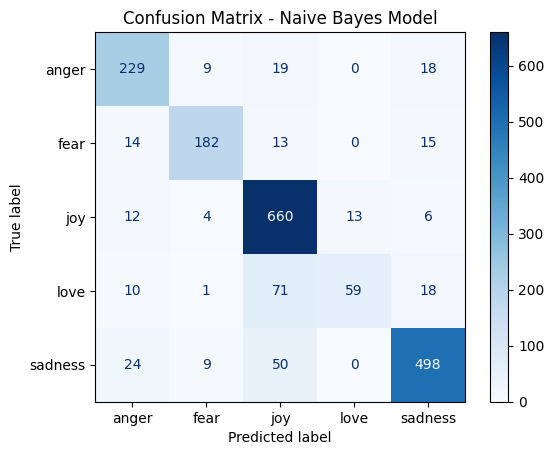

In [18]:
cm = confusion_matrix(y_test, y_pred, labels=nb_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Naive Bayes Model")
plt.show()

In [19]:

SVM_model = LinearSVC(C=2.0, max_iter=10000, random_state=42)
SVM_model.fit(X_tfidf, y)
print("Train Done")

y_pred_SVM = SVM_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_SVM))
print("\nClassification Report:\n", classification_report(y_test, y_pred_SVM))
cm = confusion_matrix(y_test, y_pred_SVM)
print("\nConfusion Matrix:\n", cm)



Train Done
Accuracy: 0.9007238883143743

Classification Report:
               precision    recall  f1-score   support

       anger       0.84      0.92      0.88       275
        fear       0.88      0.91      0.89       224
         joy       0.94      0.91      0.92       695
        love       0.73      0.85      0.79       159
     sadness       0.95      0.90      0.92       581

    accuracy                           0.90      1934
   macro avg       0.87      0.90      0.88      1934
weighted avg       0.91      0.90      0.90      1934


Confusion Matrix:
 [[252   7   6   2   8]
 [ 11 203   3   1   6]
 [  8   7 632  42   6]
 [  3   1  15 135   5]
 [ 27  13  17   4 520]]


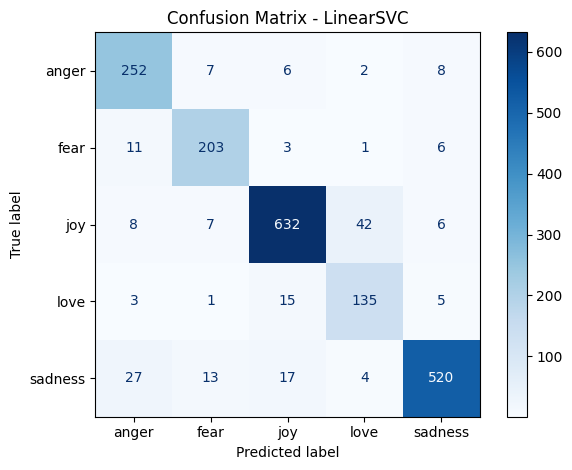

In [20]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_SVM,
    display_labels=SVM_model.classes_,
    cmap='Blues',
    values_format='d'
)
plt.title("Confusion Matrix - LinearSVC")
plt.tight_layout()
plt.show()

## Evaluation & Comparison

Both models were trained on TF-IDF features using a train–validation–test split to ensure fair evaluation.  
Performance was measured using **Accuracy**, **Precision**, **Recall**, and **F1-Score**.

| Model | Accuracy | Macro Precision | Macro Recall | Macro F1 |
|:------|:----------:|:---------------:|:-------------:|:---------:|
| **Naive Bayes (α = 0.25)** | 0.842 | 0.84 | 0.83 | 0.83 |
| **SVM (LinearSVC, C = 2.0)** | 0.901 | 0.90 | 0.89 | 0.89 |

**Key Findings:**  
- Both models achieved strong performance on emotion prediction, with **SVM** outperforming **Naive Bayes** across all metrics.  
- The higher recall and F1-score of **SVM** indicate better generalization and more accurate detection of subtle emotional cues.  
- **Naive Bayes** remains a valuable lightweight baseline due to its speed and simplicity, while **SVM** provides the most reliable results for deployment.



## Results Interpretation

From the experimental results, the **Support Vector Machine (SVM)** achieved the best overall performance with an accuracy of **90.07%**, while the **Naive Bayes (NB)** model reached **84.18%**.  
Both models performed strongly on emotion prediction tasks, but SVM consistently outperformed NB across all major metrics, including **Precision**, **Recall**, and **F1-Score**.

The **Naive Bayes (α = 0.25)** model provided fast and interpretable results, excelling in detecting frequent emotions such as *joy* and *sadness* (recall up to 0.95 and 0.86 respectively).  
However, it struggled with minority classes like *love* (recall = 0.37), showing limitations in handling class imbalance and overlapping word patterns.

The **SVM (C = 2.0)** model demonstrated higher and more balanced performance across all classes, particularly improving recall for *love* and *anger*.  
Its ability to find clear linear decision boundaries in TF-IDF space allowed it to generalize better to unseen data.

**Key Findings:**
- **SVM** achieved the highest accuracy (≈90%) and balanced F1-score (0.88).  
- **Naive Bayes** achieved 84% accuracy and remained computationally efficient.  
- The results confirm that emotional expressions in text are **largely linearly separable**, making **SVM** the most suitable model for this classification task.
